# Setup and Context


### Introduction

The data was taken from here - https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

 The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):   
        1. CRIM  -   per capita crime rate by town  
        2. ZN    -   proportion of residential land zoned for lots over 25,000 sq.ft.  
        3. INDUS  -  proportion of non-retail business acres per town  
        4. CHAS  -   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
        5. NOX   -   nitric oxides concentration (parts per 10 million)  
        6. RM     -  average number of rooms per dwelling  
        7. AGE    -  proportion of owner-occupied units built prior to 1940  
        8. DIS   -   weighted distances to five Boston employment centres  
        9. RAD    -  index of accessibility to radial highways  
        10. TAX    -  full-value property-tax rate per $10,000  
        11. PTRATIO - pupil-teacher ratio by town  
        12. B     -   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
        13. LSTAT  -  % lower status of the population  
        14. PRICE  -   Median value of owner-occupied homes in $1000's     


  
Main task:  build a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

In [101]:
# %pip install --upgrade plotly

###  Import Statements


In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Notebook Presentation

In [103]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
data = pd.read_csv('/content/drive/MyDrive/Regression/data/boston.csv', index_col=0)

# Preliminary Data Exploration 🔎


In [106]:
data.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
208,0.14,0.00,10.59,1.00,0.49,6.06,59.10,4.24,4.00,277.00,18.60,381.32,14.66,24.40
463,5.82,0.00,18.10,0.00,0.71,6.51,89.90,2.80,24.00,666.00,20.20,393.82,10.29,20.20
378,23.65,0.00,18.10,0.00,0.67,6.38,96.20,1.39,24.00,666.00,20.20,396.90,23.69,13.10
177,0.05,0.00,4.05,0.00,0.51,6.32,73.40,3.32,5.00,296.00,16.60,395.60,6.29,24.60


In [107]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

In [108]:
data.isna().values.any()

False

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [110]:
data.duplicated(keep=False).values.any()

False

## Descriptive Statistics

In [111]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [112]:
print(f'Average price of a home: {data.PRICE.mean()}')
print(f'Median price of a home: {data.PRICE.median()}')

Average price of a home: 22.532806324110677
Median price of a home: 21.2


In [113]:
print(f'Average full-value property-tax rate per $10,000: {data.TAX.mean()}')
print(f'Median full-value property-tax rate per $10,000: {data.TAX.median()}')

Average full-value property-tax rate per $10,000: 408.2371541501976
Median full-value property-tax rate per $10,000: 330.0


In [114]:
print(f'Average crime rate : {data.CRIM.mean()}')
print(f'Median crime rate: {data.CRIM.median()}')
print(f'Max crime rate: {data.CRIM.max()}')

Average crime rate : 3.613523557312254
Median crime rate: 0.25651
Max crime rate: 88.9762


In [115]:
print(f'Students per teacher on average: {data.PTRATIO.mean()}')
print(f'Median for students per teacher: {data.PTRATIO.median()}')

Students per teacher on average: 18.455533596837945
Median for students per teacher: 19.05


In [116]:
print(f'Maximum and the minimum number of rooms per dwelling: {data.RM.min()} and {data.RM.max()}')

Maximum and the minimum number of rooms per dwelling: 3.561 and 8.78


## Visualise the Features


### House Prices

In [117]:
data.PRICE = data.PRICE * 1000

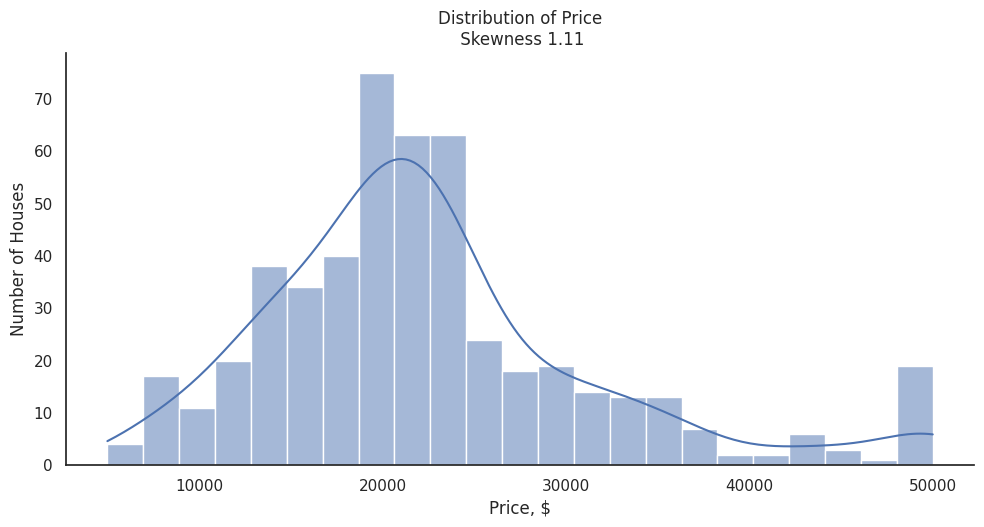

In [118]:
sns.displot(data=data, x=data.PRICE, aspect=2, kind='hist', kde=True)
skew = data.PRICE.skew().round(2)
plt.xlabel('Price, $')
plt.ylabel('Number of Houses')
plt.title(f'Distribution of Price\n Skewness {skew}')
plt.show()

The skewness value is provided as 1.11, confirming that the distribution is positively skewed. A small peak appears around the $50,000 mark, likely indicating a few higher-priced outliers.

In [119]:
# Let's drop 1% of Price outliers
data = (data[(data['PRICE'] < data['PRICE'].quantile(0.99))].reset_index(drop=True))

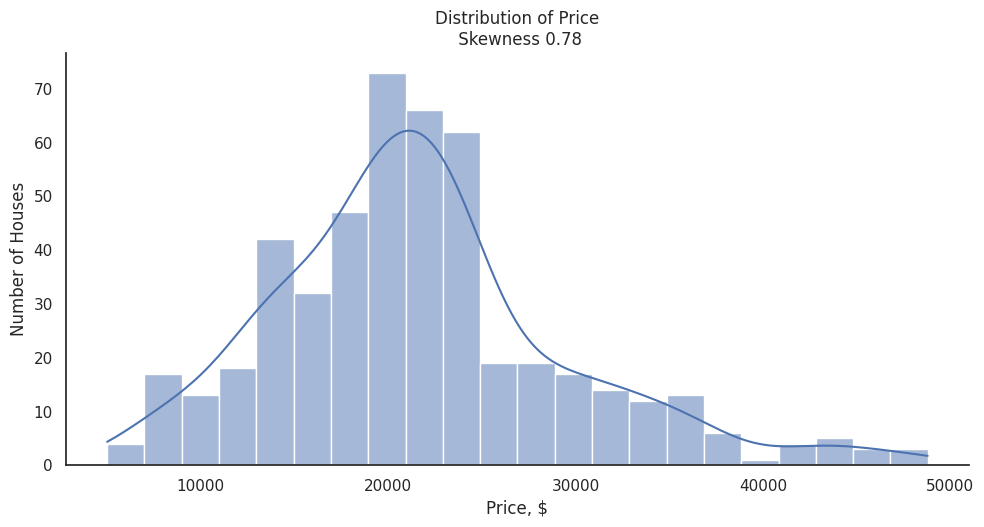

In [120]:
sns.displot(data=data, x=data.PRICE, aspect=2, kind='hist', kde=True)
skew = data.PRICE.skew().round(2)
plt.xlabel('Price, $')
plt.ylabel('Number of Houses')
plt.title(f'Distribution of Price\n Skewness {skew}')
plt.show()

### Other Features

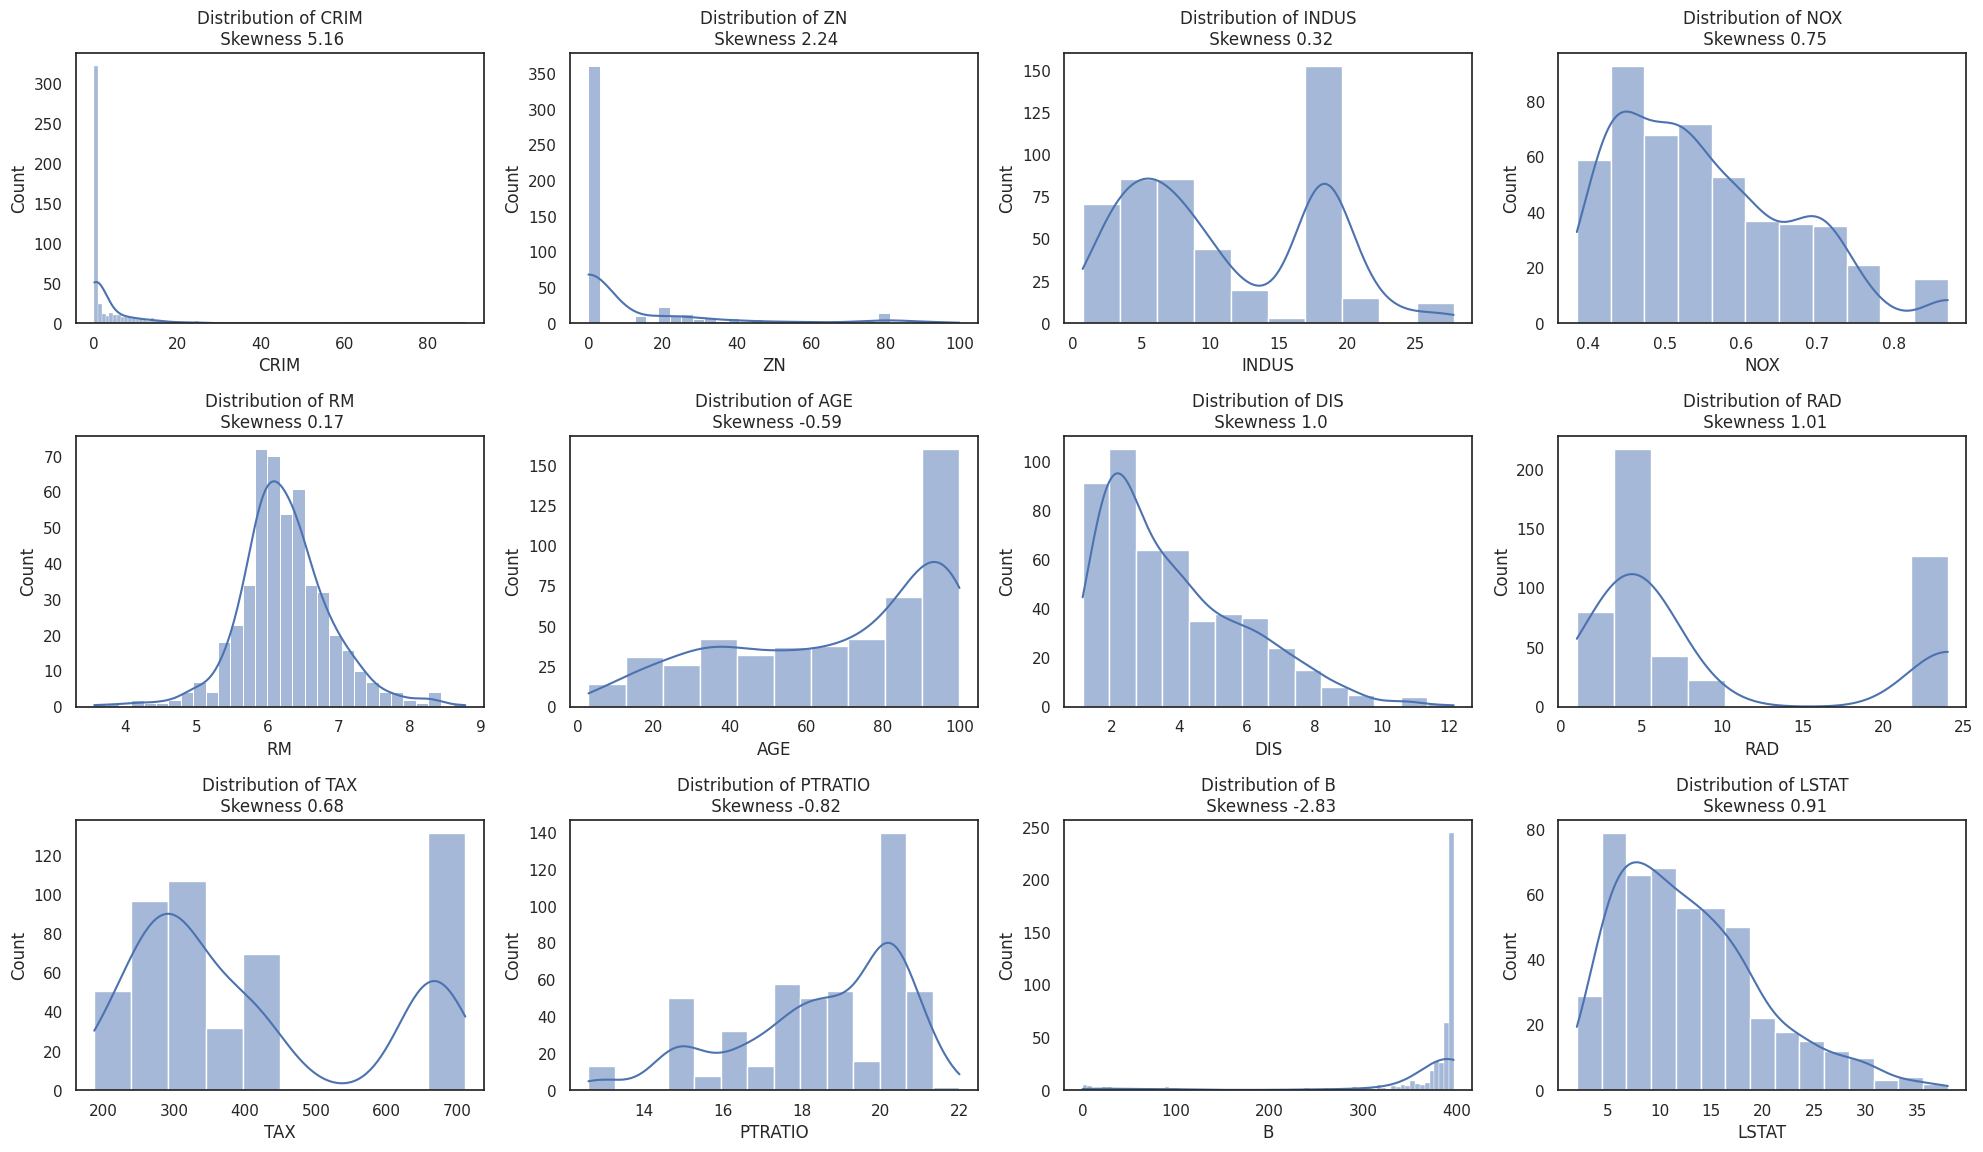

In [121]:
# Setting up the plot
sns.set(style="white")

# List of columns
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

# Plotting histograms for each column to understand the distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    skew = data[column].skew().round(2)
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}\n Skewness {skew}')
plt.tight_layout()
plt.show()


The distributions of CRIM, ZN, and B exhibit the highest skewness. Let's remove 1% of observations for these variables to see if it improves the distribution.

### Dealing with outliers

In [122]:
data_clean = (
    data[(data['CRIM'] < data['CRIM'].quantile(0.99)) &
         (data['ZN'] < data['ZN'].quantile(0.99)) &
         (data['B'] > data['B'].quantile(0.01))]
    .reset_index(drop=True)
)

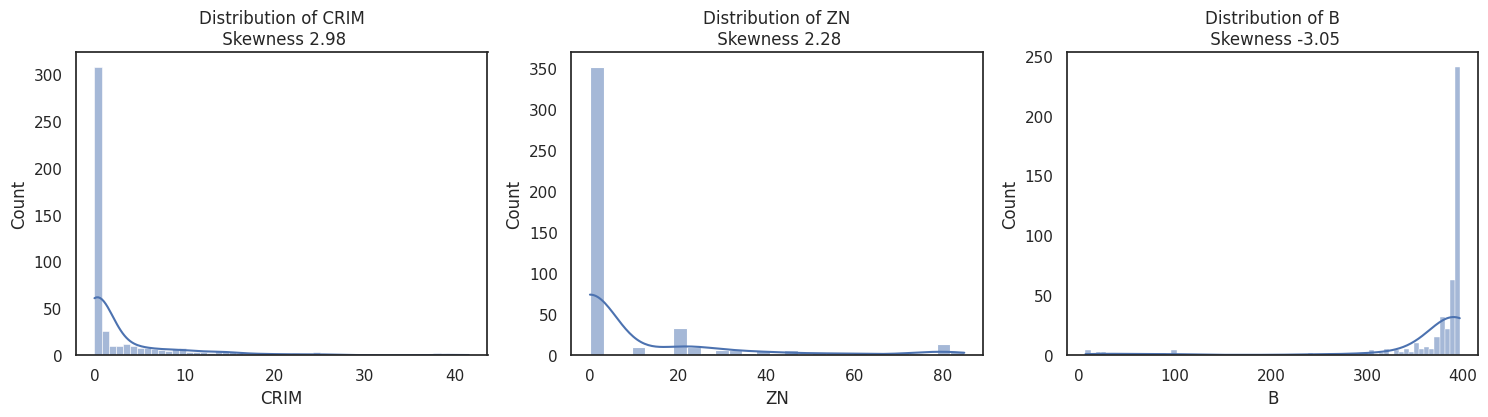

In [123]:
columns = ['CRIM', 'ZN', 'B']

#  hist for each column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    skew = data_clean[column].skew().round(2)
    sns.histplot(data_clean[column], kde=True)
    plt.title(f'Distribution of {column}\n Skewness {skew}')
plt.tight_layout()
plt.show()

After removing outliers, the distributions of CRIM and PRICE showed a slight improvement in skewness. However, CRIM, ZN, and B remain highly skewed, with skewness around 3, which we will attempt to address with a log transformation. Additionally, applying a log transformation to NOX, AGE, DIS, TAX, PTRATIO, and LSTAT may help improve their distributions.

In [124]:
# Remove CRIM outliers, but keep ZN and B outliers (as dropping the top quantile had no impact, and removing more could excessively reduce the dataset)
data_clean = (
    data[(data['CRIM'] < data['CRIM'].quantile(0.99))].reset_index(drop=True)
)

In [125]:
chas_data = data.groupby(['CHAS'], as_index=False).agg({'PRICE': pd.Series.count})
chas_data = data.CHAS.value_counts().to_frame().reset_index().rename(columns={'index': 'CHAS', 'count': 'Num_of_appartments'})
chas_data

,CHAS,Num_of_appartments
0,0.00,461
1,1.00,29


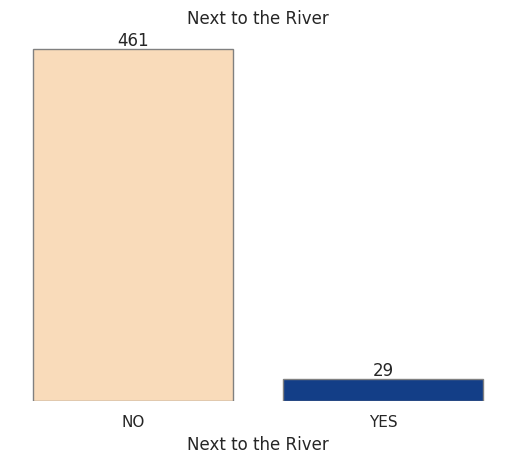

In [126]:
bars = plt.bar( x=['NO', 'YES'], height=chas_data.Num_of_appartments, color=['#F9DBBA', '#133E87'], edgecolor='grey', label=chas_data.Num_of_appartments)
plt.xlabel('Next to the River')
plt.ylabel('Number of Houses')
plt.title('Next to the River')
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position of text
        yval,  # Y position of text
        f'{yval}',  # Text to display
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.gca().yaxis.set_visible(False)
plt.show()

In [127]:
data_clean.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00,485.00
mean,3.01,11.23,11.04,0.06,0.55,6.25,67.97,3.86,9.36,405.34,18.50,357.69,12.83,"21,763.71"
std,5.87,22.93,6.82,0.24,0.12,0.65,28.14,2.11,8.61,166.86,2.11,89.54,7.01,"7,796.09"
min,0.01,0.00,0.74,0.00,0.39,3.56,2.90,1.14,1.00,187.00,12.60,0.32,1.98,"5,000.00"
25%,0.08,0.00,5.19,0.00,0.45,5.88,43.70,2.12,4.00,279.00,17.40,376.11,7.26,"17,000.00"
50%,0.24,0.00,8.56,0.00,0.53,6.19,76.50,3.32,5.00,330.00,19.10,391.93,11.65,"21,000.00"
75%,3.32,12.50,18.10,0.00,0.62,6.58,93.60,5.23,24.00,666.00,20.20,396.33,17.09,"24,700.00"
max,41.53,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,"48,800.00"


After removing outliers, we have 485 entries remaining, which is 96% of the original dataset—an acceptable retention of the initial data

# Relationships in the Data

## Assessing Linearity Between Price and Other Features

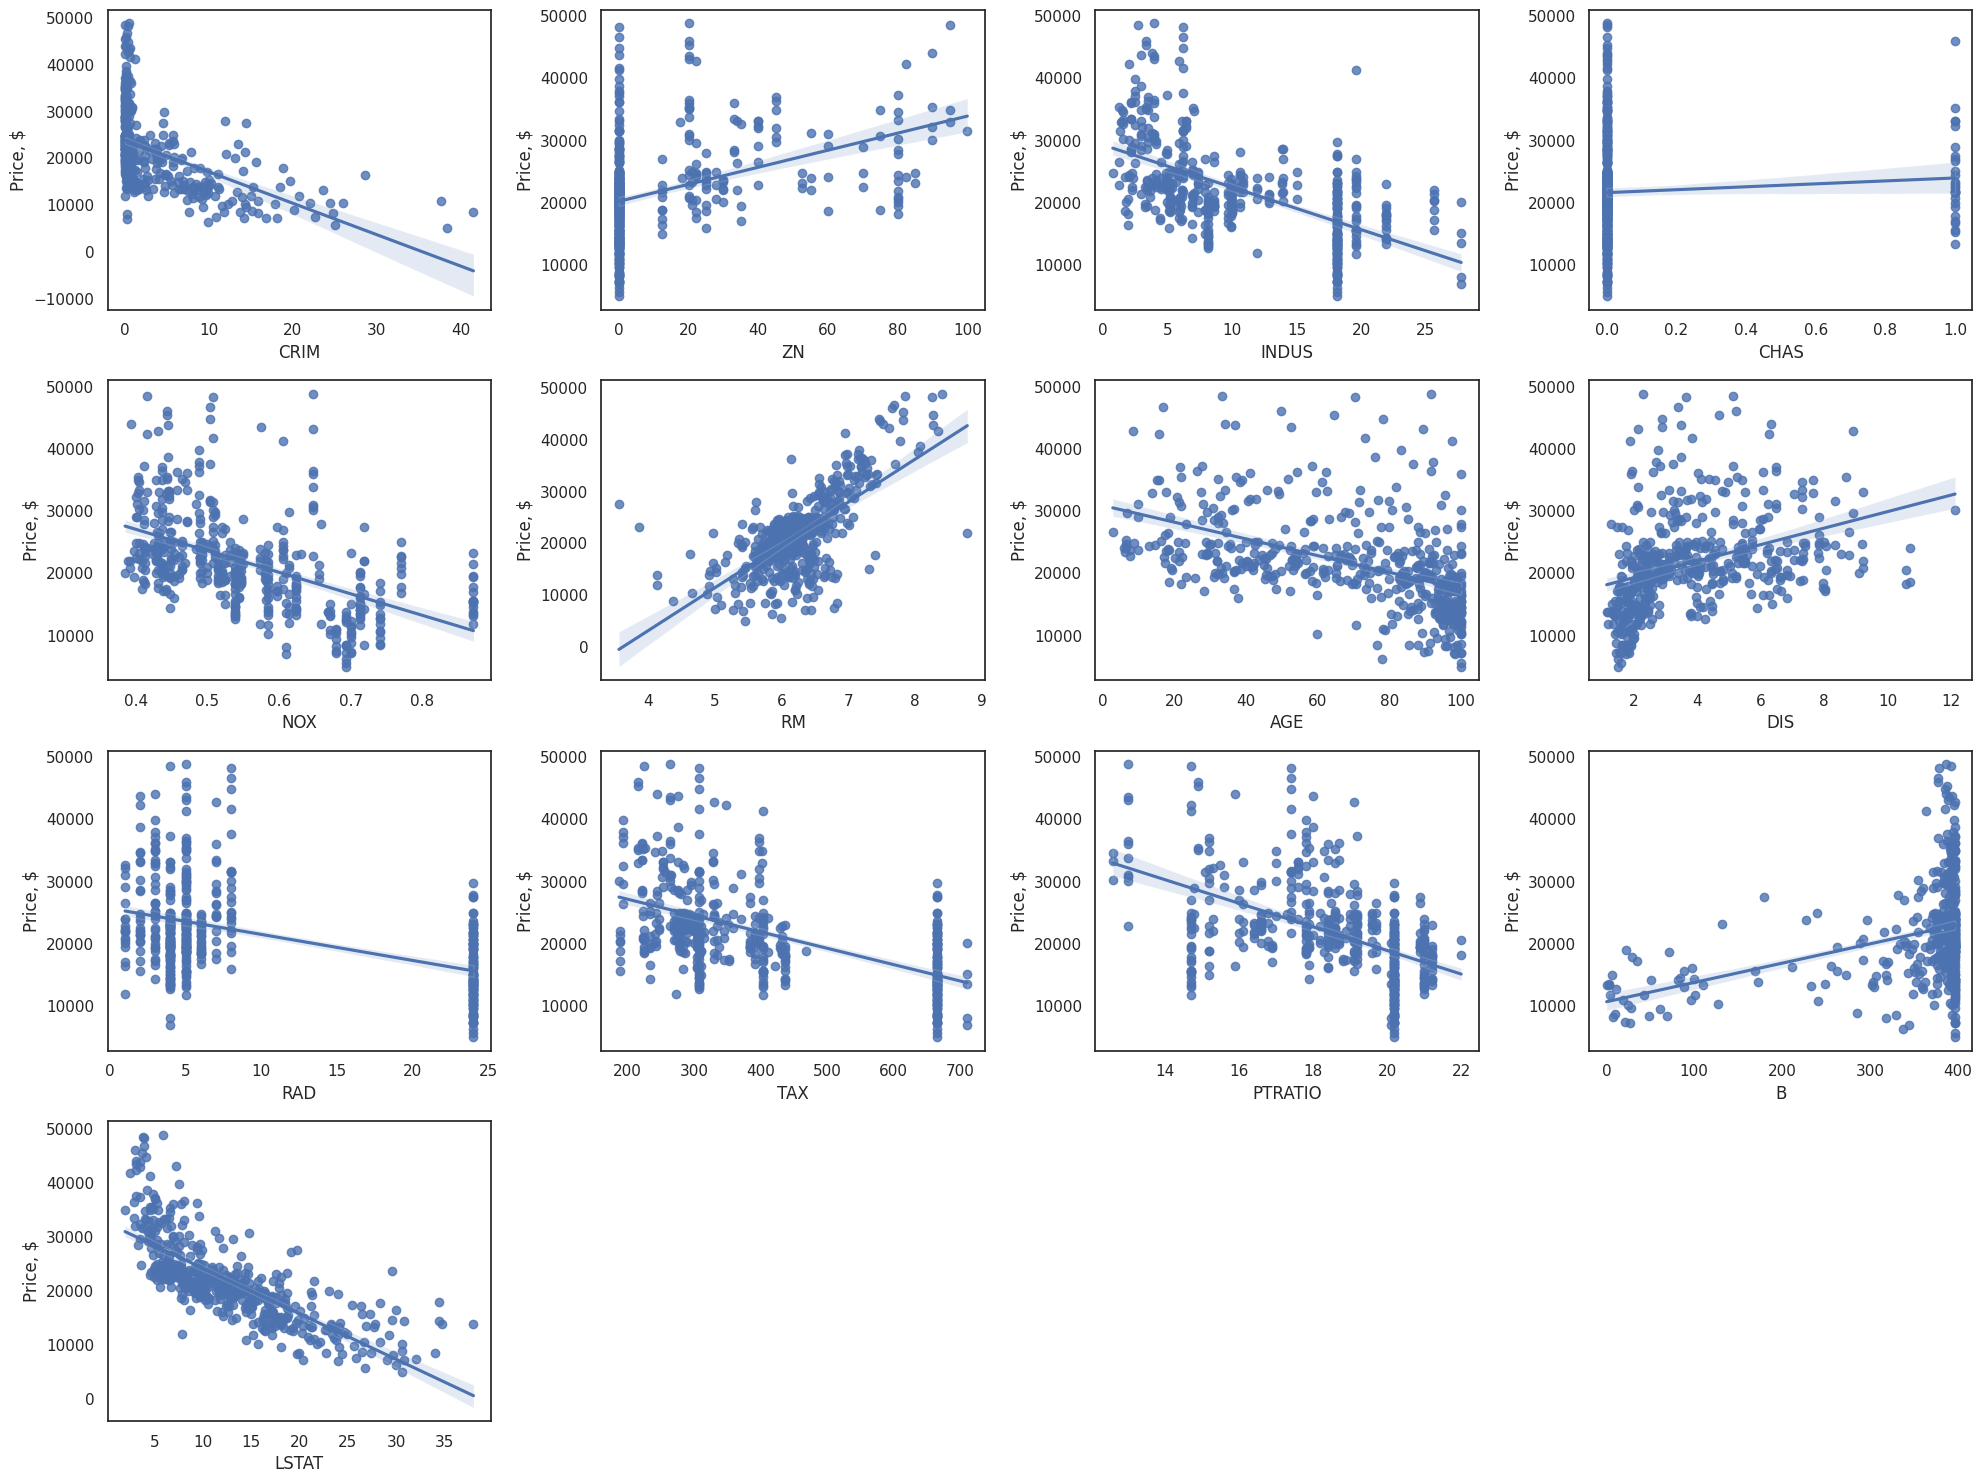

In [128]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(data_clean.columns, 1):
  if column != 'PRICE':
    plt.subplot(4, 4, i)
    sns.regplot(data=data_clean, x=column, y="PRICE")
    plt.xlabel(column)
    plt.ylabel("Price, $")

plt.tight_layout()
plt.show()

In summary, variables such as RM (rooms), LSTAT (lower status), and NOX (pollution) have strong correlations with housing prices, whereas other variables show weaker or negligible relationships.
Log transformations could be useful for CRIM, LSTAT, DIS, NOX, and possibly AGE to improve linearity, reduce heteroscedasticity, and address skewness.

# Log transformation

I will create three data transformations for three different models:

1 - Log transformation of PRICE (dependent variable) only.

2 - Log transformation (using Reflect and Log Transformation if needed) for some FEATURES.

3 - Log transformation of both PRICE and selected FEATURES. Is that appropriate for linear regressiom modelling?

### Log transformation of PRICE

In [129]:
df_price_log = data_clean.copy()
df_price_log['PRICE_log'] = np.log(df_price_log.PRICE)
df_price_log.drop('PRICE', axis=1, inplace=True)
df_price_log.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE_log
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,10.09
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,9.98
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,10.45
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,10.42
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,10.50


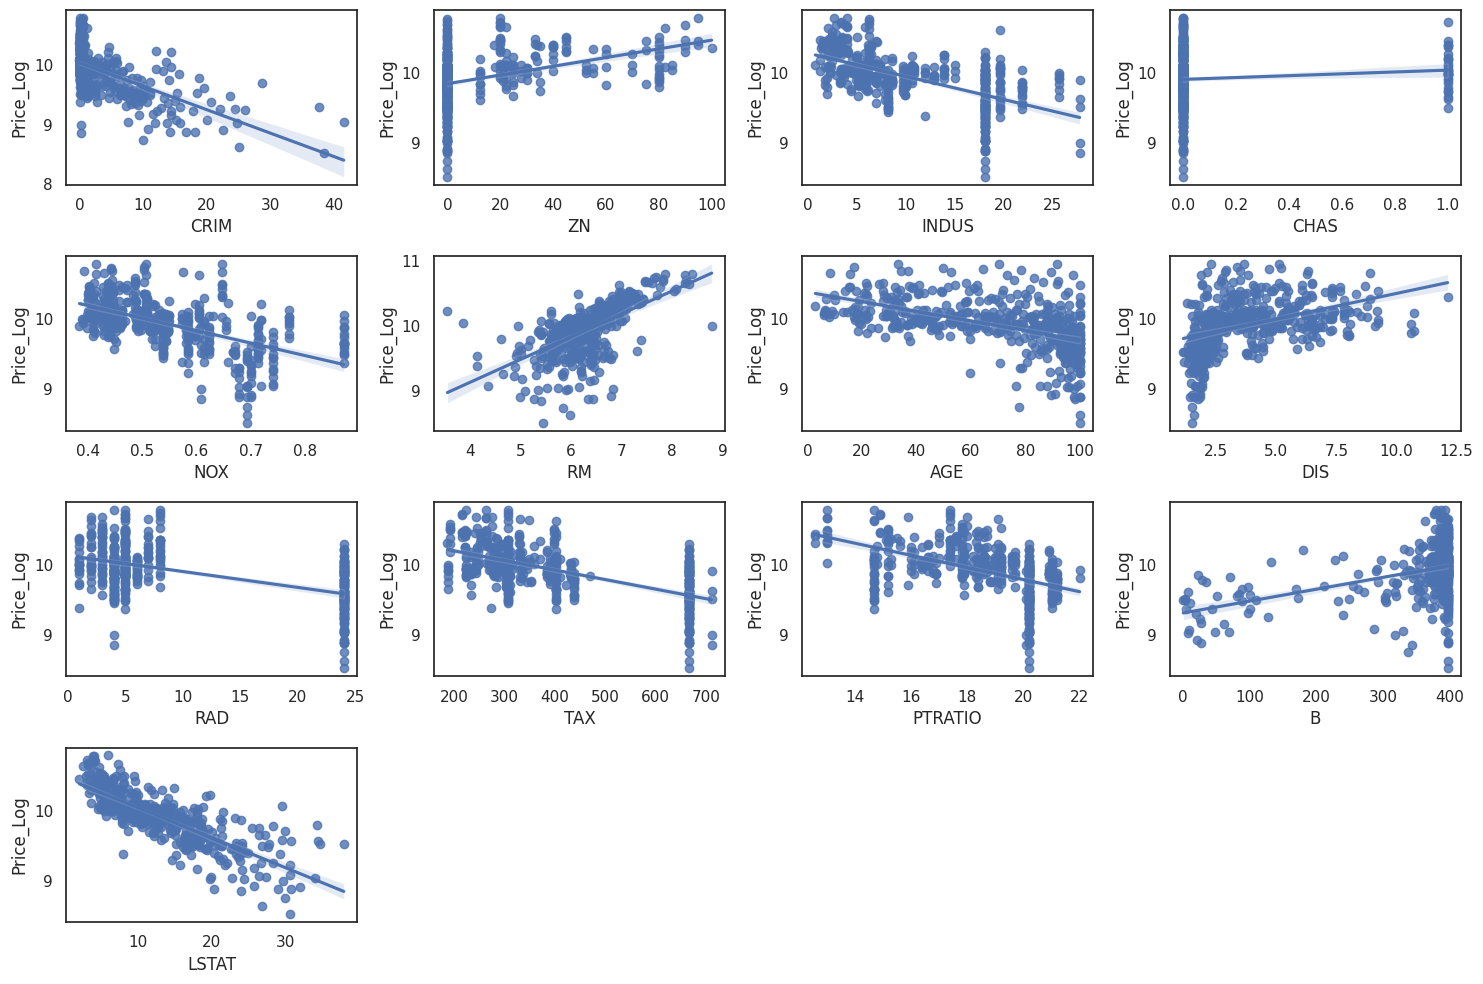

In [130]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_price_log.columns, 1):
  if column != 'PRICE_log':
    plt.subplot(4, 4, i)
    sns.regplot(data=df_price_log, x=column, y="PRICE_log")
    plt.xlabel(column)
    plt.ylabel("Price_Log")

plt.tight_layout()
plt.show()

### Log transformation of FEATURES

In [131]:
#['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
# RAD and CHAS - categorial vars

columns_for_log = ['CRIM', 'NOX', 'ZN', 'DIS', 'TAX',  'LSTAT', 'INDUS', 'PTRATIO', 'B', 'AGE']
columns_for_reflection = ['PTRATIO', 'B', 'AGE']

In [132]:
df_features_log  = data_clean.copy()

In [133]:
# reflect 'PTRATIO', 'B', 'AGE' for log transf
for col in columns_for_reflection:
  df_features_log[col] = df_features_log[col].apply(lambda x: max(df_features_log[col]) + 1 - x)

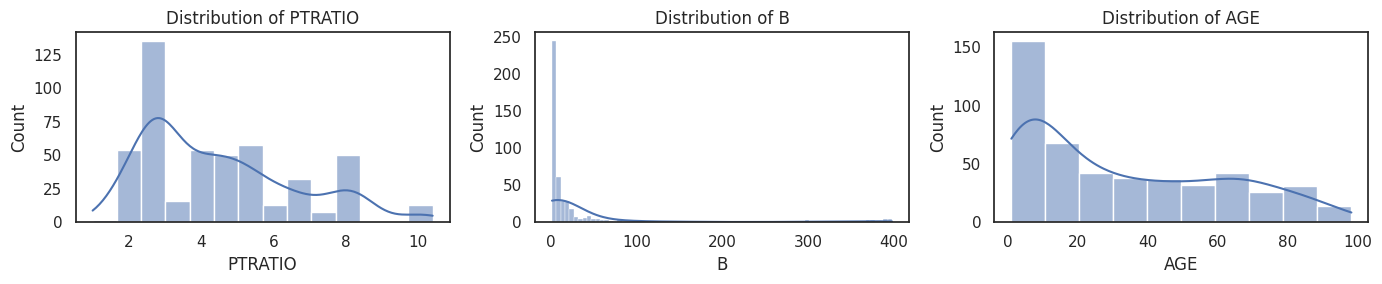

In [134]:
# Plot reflected values
plt.figure(figsize=(14, 3))
for i, column in enumerate(columns_for_reflection, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_features_log[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [135]:
for column in columns_for_log:
  df_features_log[f'{column}_log'] = np.log(df_features_log[column]+ 1).round(4)
  df_features_log.drop(column, axis=1, inplace=True)

df_features_log.head()

,CHAS,RM,RAD,PRICE,CRIM_log,NOX_log,ZN_log,DIS_log,TAX_log,LSTAT_log,INDUS_log,PTRATIO_log,B_log,AGE_log
0,0.00,6.58,1.00,"24,000.00",0.01,0.43,2.94,1.63,5.69,1.79,1.20,2.16,0.69,3.61
1,0.00,6.42,2.00,"21,600.00",0.03,0.38,0.00,1.79,5.49,2.32,2.09,1.82,0.69,3.14
2,0.00,7.18,2.00,"34,700.00",0.03,0.38,0.00,1.79,5.49,1.62,2.09,1.82,1.80,3.71
3,0.00,7.00,3.00,"33,400.00",0.03,0.38,0.00,1.95,5.41,1.37,1.16,1.67,1.45,4.03
4,0.00,7.15,3.00,"36,200.00",0.07,0.38,0.00,1.95,5.41,1.85,1.16,1.67,0.69,3.87


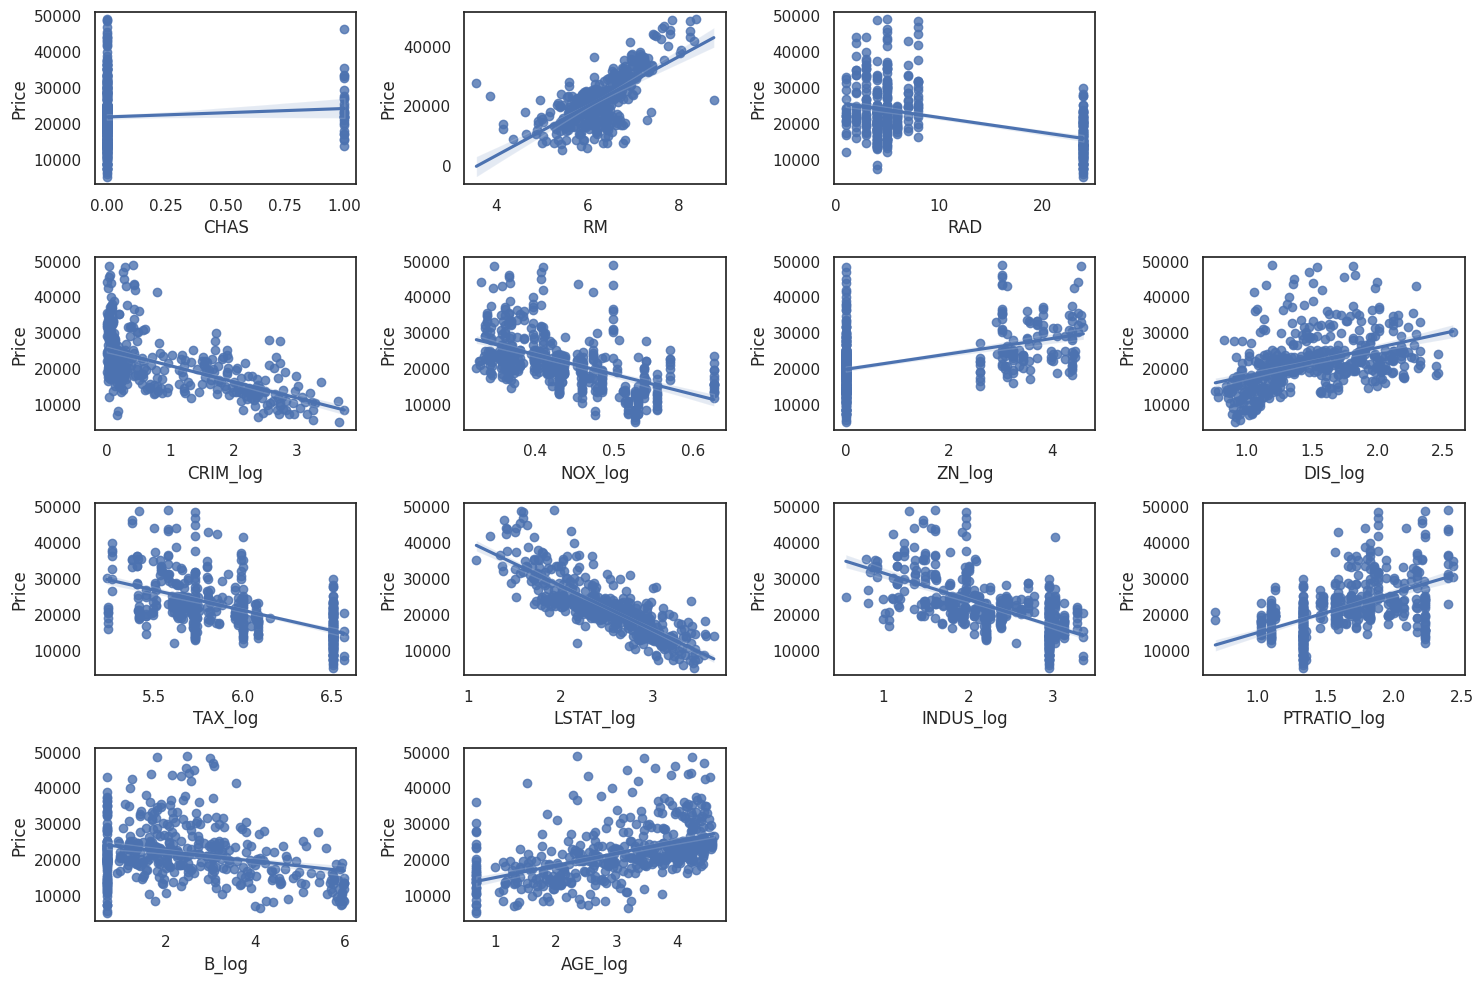

In [136]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_features_log.columns, 1):
  if column != 'PRICE':
    plt.subplot(4, 4, i)
    sns.regplot(data=df_features_log, x=column, y="PRICE")
    plt.xlabel(column)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

### Log transformation of PRICE and FEATURES

In [137]:
df_price_features_log = df_features_log.copy()
df_price_features_log['PRICE_log'] = np.log(df_price_features_log.PRICE)
df_price_features_log.drop('PRICE', axis=1, inplace=True)

df_price_features_log.head()

,CHAS,RM,RAD,CRIM_log,NOX_log,ZN_log,DIS_log,TAX_log,LSTAT_log,INDUS_log,PTRATIO_log,B_log,AGE_log,PRICE_log
0,0.00,6.58,1.00,0.01,0.43,2.94,1.63,5.69,1.79,1.20,2.16,0.69,3.61,10.09
1,0.00,6.42,2.00,0.03,0.38,0.00,1.79,5.49,2.32,2.09,1.82,0.69,3.14,9.98
2,0.00,7.18,2.00,0.03,0.38,0.00,1.79,5.49,1.62,2.09,1.82,1.80,3.71,10.45
3,0.00,7.00,3.00,0.03,0.38,0.00,1.95,5.41,1.37,1.16,1.67,1.45,4.03,10.42
4,0.00,7.15,3.00,0.07,0.38,0.00,1.95,5.41,1.85,1.16,1.67,0.69,3.87,10.50


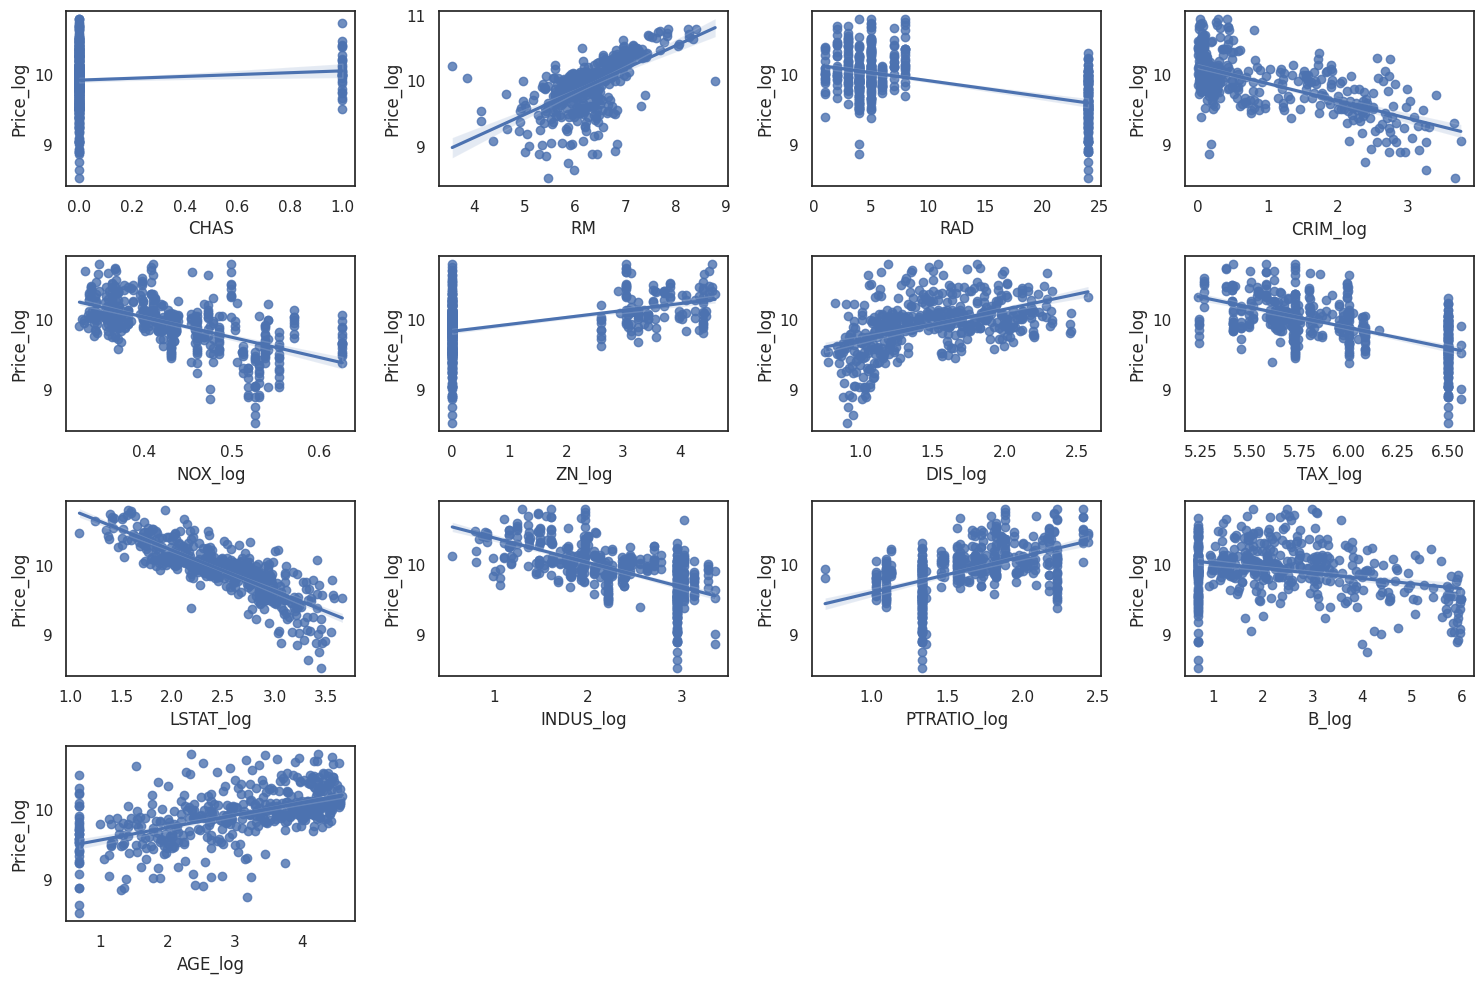

In [138]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_price_features_log.columns, 1):
  if column != 'PRICE_log':
    plt.subplot(4, 4, i)
    sns.regplot(data=df_price_features_log, x=column, y="PRICE_log")
    plt.xlabel(column)
    plt.ylabel("Price_log")

plt.tight_layout()
plt.show()

## Multicollinearity assesment

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(train):
  for col in train.columns:
    if col == 'PRICE_log':
      train.drop('PRICE_log', axis=1, inplace=True)
    elif col == 'PRICE':
      train.drop('PRICE', axis=1, inplace=True)
  vif = pd.DataFrame()
  vif["feature"] = train.columns
  vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
  return vif

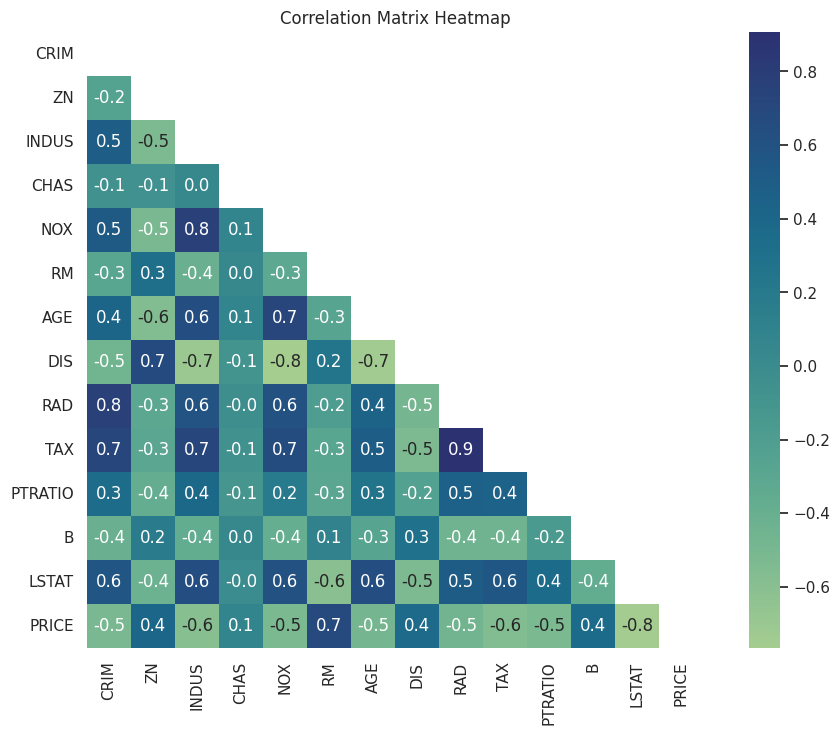

In [140]:
plt.figure(figsize=(12, 8))
correlation_matrix = data_clean.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,  mask=mask, cmap="crest", annot=True, fmt=".1f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

RAD and TAX (Correlation = 0.9):
This is the strongest correlation in the heatmap. "RAD" (accessibility to radial highways) and "TAX" (property tax rate) may be highly correlated because areas with high access to highways could have similar tax structures. This high correlation suggests a significant overlap in the information these two variables provide, leading to multicollinearity. Including both variables in a model may cause instability in regression coefficients.

RAD and CRIM (Correlation = 0.8):
"RAD" and "CRIM" (per capita crime rate) also have a strong positive correlation. This could indicate that areas with high highway accessibility also have higher crime rates. This correlation might be structural (i.e., certain urban areas have both high crime and greater access to highways), creating multicollinearity. Using both variables in a model could lead to redundancy, as they share some of the same variance.

NOX and INDUS (Correlation = 0.8):
"NOX" (nitrogen oxide concentration) and "INDUS" (proportion of non-retail business acres) have a strong positive correlation. This is likely because industrial areas typically have higher pollution levels. In regression models, these two variables may carry similar information about urban density or pollution, contributing to multicollinearity.

High correlations (above 0.7) among predictor variables can lead to multicollinearity

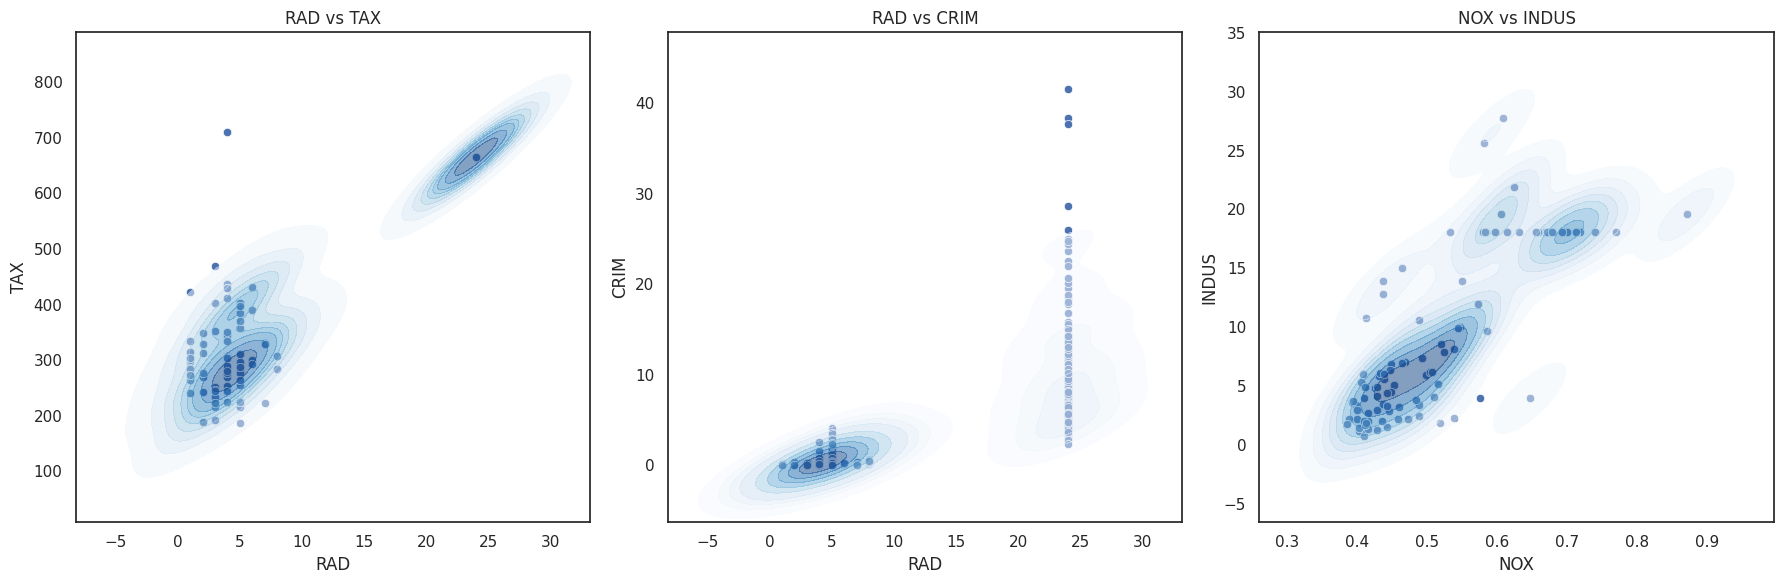

In [141]:
# Adjust the figure size if needed
plt.figure(figsize=(18, 6))

# First subplot
plt.subplot(1, 3, 1)
sns.scatterplot(x='RAD', y='TAX', data=data_clean)
sns.kdeplot(x='RAD', y='TAX', data=data_clean, cmap='Blues', fill=True, alpha=0.5)
plt.title('RAD vs TAX')

# Second subplot
plt.subplot(1, 3, 2)
sns.scatterplot(x='RAD', y='CRIM', data=data_clean)
sns.kdeplot(x='RAD', y='CRIM', data=data_clean, cmap='Blues', fill=True, alpha=0.5)
plt.title('RAD vs CRIM')

# Third subplot
plt.subplot(1, 3, 3)
sns.scatterplot(x='NOX', y='INDUS', data=data_clean)
sns.kdeplot(x='NOX', y='INDUS', data=data_clean, cmap='Blues', fill=True, alpha=0.5)
plt.title('NOX vs INDUS')

# Display the plot
plt.tight_layout()
plt.show()

# Split Training & Test Dataset



In [142]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## Declare inputs and the target

In [143]:
X_features = pd.DataFrame(df_price_log, columns=[col for col in df_price_log if col != 'PRICE_log' and col != "PRICE"])

In [144]:
X_features_log = pd.DataFrame(df_features_log, columns=[col for col in df_features_log if col != 'PRICE_log' and col != "PRICE"])

In [145]:
y_target_price = pd.DataFrame(df_features_log, columns=['PRICE'])

In [146]:
y_target_price_log = pd.DataFrame(df_price_log, columns=['PRICE_log'])

### Scale the data

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_features)

StandardScaler()

In [148]:
features_scaled = scaler.transform(X_features)
features_scaled = pd.DataFrame(features_scaled, columns=X_features.columns)

In [149]:
scaler2 = StandardScaler()
scaler2.fit(X_features_log)

StandardScaler()

In [150]:
features_log_scaled = scaler2.transform(X_features_log)
features_log_scaled = pd.DataFrame(features_log_scaled, columns=X_features_log.columns)

### Train/test *split*

In [151]:
# split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y_target_price, test_size=0.30, train_size=0.70, random_state=1)

In [152]:
# split data with Log transformation
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_log_scaled, y_target_price_log, test_size=0.30, train_size=0.70, random_state=1)

In [153]:
# % of training set
train_pct = 100*len(X_train)/len(features_scaled)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features_scaled.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 69.9% of the total data.
Test data makes up the remaining 30.1%.


###  Multicollinearity check

In [154]:
x = check_vif(X_train)
y = check_vif(X_train_log)
vifs = pd.merge(x, y, on='feature', suffixes=('_features', '_features_log'), how='outer')
vifs.sort_values(by=['VIF_features', 'VIF_features_log'], ascending= False)

,feature,VIF_features,VIF_features_log
19,TAX,8.01,NaN
17,RAD,7.73,9.62
13,NOX,4.43,NaN
7,DIS,4.02,NaN
9,INDUS,3.94,NaN
11,LSTAT,3.36,NaN
0,AGE,3.15,NaN
5,CRIM,3.01,NaN
21,ZN,2.28,NaN
18,RM,1.88,1.97


"TAX" feature has the highest VIF (8.10), suggesting moderate multicollinearity, followed by "RAD" (7.93) and other variables.

 Among the log-transformed features, "CRIM_log" has the highest VIF (9.71), indicating possible multicollinearity in the transformed data. CRIM_log has the highest VIF among the log-transformed features, suggesting that it still shares substantial information with other features, possibly because the crime rate might be related to other socio-economic factors (e.g., property tax, highway access)

In [155]:
# let's remove features with high vif values - TAX for features and CRIM_log for transformed data

X_train = X_train.drop('TAX', axis=1)
X_train_log = X_train_log.drop('CRIM_log', axis=1)

x = check_vif(X_train)
y = check_vif(X_train_log)
vifs = pd.merge(x, y, on='feature', suffixes=('_features', '_features_log'), how='outer')
vifs.sort_values(by=['VIF_features', 'VIF_features_log'], ascending= False)

,feature,VIF_features,VIF_features_log
12,NOX,4.40,NaN
6,DIS,4.02,NaN
16,RAD,3.53,4.11
10,LSTAT,3.35,NaN
8,INDUS,3.32,NaN
0,AGE,3.15,NaN
5,CRIM,3.01,NaN
19,ZN,2.15,NaN
17,RM,1.87,1.94
14,PTRATIO,1.76,NaN


# OLS Regression (OLS from stats.models.api)


### Model 1 (without transformation)

In [156]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     84.59
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.00e-92
Time:                        16:33:14   Log-Likelihood:                -3275.8
No. Observations:                 339   AIC:                             6578.
Df Residuals:                     326   BIC:                             6627.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.18e+04    211.780    102.947      0.000    2.14e+04    2.22e+04
CRIM       -1000.2015    357.386     -2.799      0.005   -1703.276    -297.127
ZN           601.9819    314.437      1.914      0.056     -16.600    1220.564
INDUS       -926.8857    382.808     -2.421      0.016   -1679.971    -173.800
CHAS         109.7616    198.724      0.552      0.581    -281.182     500.705
NOX        -1760.5433    441.679     -3.986      0.000   -2629.443    -891.643
RM          2178.1553    284.871      7.646      0.000    1617.738    2738.572
AGE         -314.1917    378.021     -0.831      0.406   -1057.860     429.476
DIS        -2679.8136    440.994     -6.077      0.000   -3547.366   -1812.261
RAD         1060.6496    399.127      2.657      0.008     275.460    1845.839
PTRATIO    -1938.4410    281.105     -6.896      0.000   -2491.451   -1385.431
B            761.4349    254.965      2.986      0.003     259.851    1263.019
LSTAT      -2756.8563    383.291     -7.193      0.000   -3510.891   -2002.821
==============================================================================
Omnibus:                       40.402   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.996
Skew:                           0.740   Prob(JB):                     1.27e-14
Kurtosis:                       4.529   Cond. No.                         6.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 (All Data Log Transformed)

In [157]:
x = sm.add_constant(X_train_log)
results = sm.OLS(y_train_log, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_log   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     72.25
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           3.14e-84
Time:                        16:33:14   Log-Likelihood:                 68.014
No. Observations:                 339   AIC:                            -110.0
Df Residuals:                     326   BIC:                            -60.29
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9247      0.011    899.809      0.000       9.903       9.946
CHAS            0.0156      0.011      1.477      0.141      -0.005       0.036
RM              0.0420      0.015      2.781      0.006       0.012       0.072
RAD             0.0261      0.022      1.165      0.245      -0.018       0.070
NOX_log        -0.0580      0.024     -2.419      0.016      -0.105      -0.011
ZN_log         -0.0182      0.017     -1.075      0.283      -0.052       0.015
DIS_log        -0.0427      0.025     -1.707      0.089      -0.092       0.007
TAX_log        -0.0758      0.024     -3.176      0.002      -0.123      -0.029
LSTAT_log      -0.2251      0.020    -11.148      0.000      -0.265      -0.185
INDUS_log      -0.0003      0.022     -0.012      0.991      -0.043       0.043
PTRATIO_log     0.0710      0.015      4.758      0.000       0.042       0.100
B_log          -0.0073      0.013     -0.579      0.563      -0.032       0.018
AGE_log        -0.0112      0.020     -0.567      0.571      -0.050       0.028
==============================================================================
Omnibus:                       44.865   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.042
Skew:                          -0.665   Prob(JB):                     2.56e-23
Kurtosis:                       5.366   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3 (Price Log Transformed)

In [158]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train_log, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     91.75
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           8.82e-97
Time:                        16:33:14   Log-Likelihood:                 98.376
No. Observations:                 339   AIC:                            -170.8
Df Residuals:                     326   BIC:                            -121.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9235      0.010    985.085      0.000       9.904       9.943
CRIM          -0.1109      0.017     -6.526      0.000      -0.144      -0.078
ZN             0.0146      0.015      0.974      0.331      -0.015       0.044
INDUS         -0.0249      0.018     -1.367      0.173      -0.061       0.011
CHAS           0.0117      0.009      1.242      0.215      -0.007       0.030
NOX           -0.0955      0.021     -4.544      0.000      -0.137      -0.054
RM             0.0506      0.014      3.736      0.000       0.024       0.077
AGE            0.0059      0.018      0.327      0.744      -0.029       0.041
DIS           -0.0948      0.021     -4.517      0.000      -0.136      -0.053
RAD            0.0760      0.019      4.002      0.000       0.039       0.113
PTRATIO       -0.0877      0.013     -6.561      0.000      -0.114      -0.061
B              0.0341      0.012      2.814      0.005       0.010       0.058
LSTAT         -0.1724      0.018     -9.453      0.000      -0.208      -0.136
==============================================================================
Omnibus:                       28.462   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.901
Skew:                           0.009   Prob(JB):                     3.39e-27
Kurtosis:                       5.938   Cond. No.                         6.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4 (Log Data without Target transformation)

In [159]:
x = sm.add_constant(X_train_log)
results = sm.OLS(y_train, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     94.44
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.37e-98
Time:                        16:33:14   Log-Likelihood:                -3261.5
No. Observations:                 339   AIC:                             6549.
Df Residuals:                     326   BIC:                             6599.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.184e+04    203.239    107.455      0.000    2.14e+04    2.22e+04
CHAS          157.0178    194.137      0.809      0.419    -224.901     538.937
RM           1581.2399    278.036      5.687      0.000    1034.270    2128.210
RAD          1195.5122    412.932      2.895      0.004     383.165    2007.859
NOX_log     -1380.4640    441.973     -3.123      0.002   -2249.943    -510.985
ZN_log         20.0237    311.941      0.064      0.949    -593.647     633.695
DIS_log     -2092.4650    460.911     -4.540      0.000   -2999.200   -1185.730
TAX_log     -1738.2500    439.583     -3.954      0.000   -2603.026    -873.474
LSTAT_log   -4338.5795    372.088    -11.660      0.000   -5070.575   -3606.584
INDUS_log    -684.0222    401.401     -1.704      0.089   -1473.684     105.640
PTRATIO_log  1555.5674    275.101      5.655      0.000    1014.369    2096.766
B_log         -83.6207    233.458     -0.358      0.720    -542.896     375.655
AGE_log      -338.0201    364.899     -0.926      0.355   -1055.873     379.833
==============================================================================
Omnibus:                        7.691   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.569
Skew:                           0.257   Prob(JB):                       0.0138
Kurtosis:                       3.586   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
models  = pd.DataFrame(index=['Model_1', 'Model_2 (x_y_log)', 'Model_3 (y_log)', 'Model_4 (x_log)'],
                       data = [
                        [0.757, 0.748, 84.59,	2.00e-92,	6578, 6627],
                        [0.727,	0.717,	72.25,	3.14e-84,	-110.0, -60.29],
                        [0.772, 0.763, 91.75, 8.82e-97, -170.8, -121.0],
                        [0.777, 0.768, 94.44, 2.37e-98, 6549, 6599]],
                       columns =['R-squared', 'Adj.R-squared', 'F-stat', 'Prob(F-stat)', 'AIC', 'BIC'])
pd.options.display.float_format = '{:,.3f}'.format
models

,R-squared,Adj.R-squared,F-stat,Prob(F-stat),AIC,BIC
Model_1,0.757,0.748,84.590,0.000,"6,578.000","6,627.000"
Model_2 (x_y_log),0.727,0.717,72.250,0.000,-110.000,-60.290
Model_3 (y_log),0.772,0.763,91.750,0.000,-170.800,-121.000
Model_4 (x_log),0.777,0.768,94.440,0.000,"6,549.000","6,599.000"


**R-squared:** Values range from 0.727 to 0.777 across the models, with Model_4 (x_log) having the highest R-squared value (0.777).

**Adj. R-squared: **Values range from 0.717 to 0.768, with Model_4 (x_log) having the highest value (0.768).

**F-stat:** The F-statistic is used to test the overall significance of the model.
Values range from 72.250 to 94.440, with Model_4 (x_log) having the highest F-stat (94.440).

**Prob(F-stat):** The p-value for the F-statistic, indicating the significance level. All models have a p-value of 0.000, implying high statistical significance.

**AIC (Akaike Information Criterion): **A measure of the model's quality, where a lower value indicates a better model fit with fewer predictors.The lowest AIC is for Model_3 (y_log) (-170.800), suggesting it's potentially the best model in terms of quality.

**BIC (Bayesian Information Criterion):** Similar to AIC but with a stronger penalty for models with more parameters. Lower values indicate a better model.
The lowest BIC is for Model_3 (y_log) (-121.000)

**Observations:**
- Model_4 (x_log) has the highest R-squared and Adj. R-squared values, indicating a strong fit.
- Model_3 (y_log) has the lowest AIC and BIC values, suggesting it balances model complexity and fit the best.
- All models are statistically significant (Prob(F-stat) = 0.000).

**Let's delve deeper into Model_4, which has the highest R-squared value, indicating it explains the most variance among the tested models.**

### Model 4 adjusted

In Model 4, the p-values for ZN_log, INDUS_log, CHAS, B_log, and AGE_log are greater than 0.05, suggesting that their coefficients are not significantly different from zero and do not add explanatory power to the model. Therefore, I
 will remove them

In [160]:
features = features_log_scaled.drop(['ZN_log', 'INDUS_log', 'B_log', 'CRIM_log', 'AGE_log', 'CHAS'], axis=1)
target = df_features_log['PRICE']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features, target, test_size=0.30, train_size=0.70, random_state=1)

x = sm.add_constant(X_train_f)
results = sm.OLS(y_train_f, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.14e-102
Time:                        16:33:14   Log-Likelihood:                -3263.9
No. Observations:                 339   AIC:                             6544.
Df Residuals:                     331   BIC:                             6574.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.183e+04    202.761    107.683      0.000    2.14e+04    2.22e+04
RM           1709.5397    267.893      6.381      0.000    1182.552    2236.527
RAD          1196.2761    406.145      2.945      0.003     397.326    1995.226
NOX_log     -1470.3057    421.012     -3.492      0.001   -2298.502    -642.109
DIS_log     -2008.7471    384.620     -5.223      0.000   -2765.354   -1252.140
TAX_log     -1882.3443    422.757     -4.453      0.000   -2713.973   -1050.715
LSTAT_log   -4291.0516    332.675    -12.899      0.000   -4945.475   -3636.628
PTRATIO_log  1680.5423    248.289      6.768      0.000    1192.119    2168.966
==============================================================================
Omnibus:                        8.715   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.402
Skew:                           0.301   Prob(JB):                      0.00908
Kurtosis:                       3.550   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS Regression (sklearn)


In [161]:
reg = LinearRegression()
reg.fit(X_train_f, y_train_f)

LinearRegression()

In [162]:
# r-squared for the regression
rsquared = reg.score(X_train_f, y_train_f)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.77


In [163]:
y_hat = reg.predict(X_train_f)

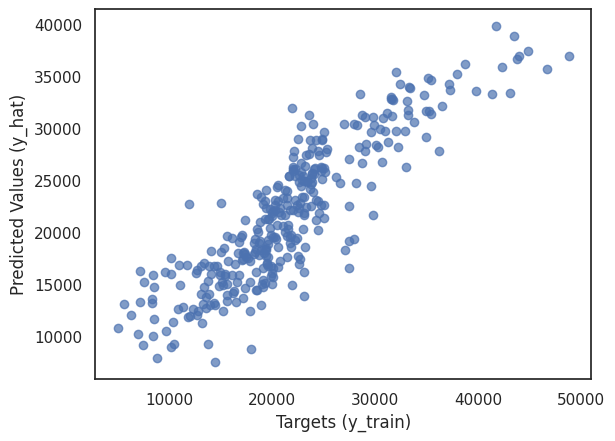

In [183]:
plt.scatter(y_train_f, y_hat, alpha=0.7)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predicted Values (y_hat)')
plt.show()

### Check Residuals

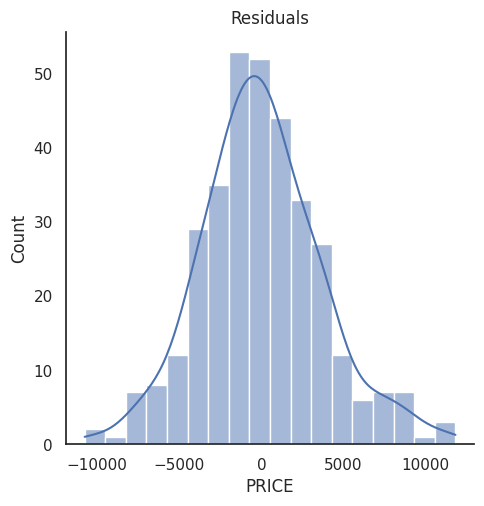

In [165]:
sns.displot((y_train_f - y_hat), kde=True)
plt.title('Residuals')
plt.show()

The residuals look fairly symmetric, with a slight skew visible on the left. This suggests that most of the errors are evenly distributed but that there might be a slight tendency to underpredict for some observations.

### Weights and bias

In [166]:
reg.intercept_

21833.809975506367

In [167]:
reg_summary = pd.DataFrame(X_train_f.columns.values, columns=['Features'])
reg_summary["Weights"] = reg.coef_
reg_summary.sort_values(by='Weights', ascending=False)

,Features,Weights
0,RM,"1,709.54"
6,PTRATIO_log,"1,680.54"
1,RAD,"1,196.28"
2,NOX_log,"-1,470.31"
4,TAX_log,"-1,882.34"
3,DIS_log,"-2,008.75"
5,LSTAT_log,"-4,291.05"


## Testing

In [168]:
y_hat_test = reg.predict(X_test_f)

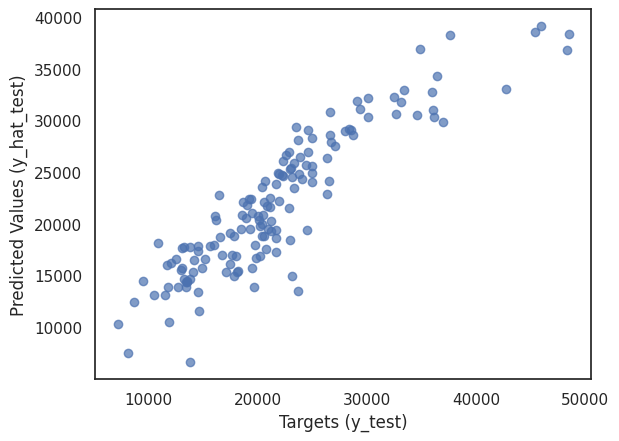

In [169]:
plt.scatter(y_test_f, y_hat_test, alpha = 0.7)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predicted Values (y_hat_test)')
plt.show()

In [170]:
y_test_f = y_test_f.reset_index(drop=True)

In [171]:
df_prices = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_prices["Target"] =y_test_f
df_prices["Residual"] = df_prices["Target"] - df_prices["Prediction"]
df_prices["Difference%"] = np.abs(df_prices["Residual"] / df_prices["Target"] * 100)
df_prices.sort_values("Difference%", ascending=False)

,Prediction,Target,Residual,Difference%
36,"18,154.67","10,900.00","-7,254.67",66.56
88,"14,461.35","9,500.00","-4,961.35",52.22
50,"6,646.88","13,800.00","7,153.12",51.83
49,"12,485.76","8,700.00","-3,785.76",43.51
113,"10,326.29","7,200.00","-3,126.29",43.42
...,...,...,...,...
96,"23,457.24","23,300.00",-157.24,0.67
41,"32,319.66","32,500.00",180.34,0.55
47,"28,615.60","28,700.00",84.40,0.29
5,"24,951.35","25,000.00",48.65,0.19


In [172]:
df_prices.describe()

,Prediction,Target,Residual,Difference%
count,146.00,146.00,146.00,146.00
mean,"21,961.63","21,728.77",-232.86,13.55
std,"6,804.40","7,974.23","3,443.69",11.57
min,"6,646.88","7,200.00","-7,254.67",0.18
25%,"16,755.88","16,275.00","-2,557.92",5.89
50%,"20,842.64","20,750.00",-883.53,10.38
75%,"26,432.13","24,600.00","1,433.65",18.00
max,"39,144.93","48,500.00","11,493.54",66.56


The model exhibits a generally good predictive ability, with an average percentage error of 13.55%, suggesting that the model's estimates are relatively accurate for many instances.

However, there is variability in the residuals, pointing to some cases where predictions are significantly off. The model tends to slightly underestimate house prices, as shown by the negative mean residual.

Overall, it's a reasonably performing regression model, but there is room to optimize predictions to reduce the percentage error further, especially for the outliers with higher errors.